<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Sep29-30/Clase30Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Primero tenemos que ver si nuestros datos tienene algún error.

- Definimos un modelo:
Para este caso, usamos un modelo lineal
$$ f = w_0 + w_1 x $$

Definimos un $\theta = [w_0, w_1]$.

1) Definimos un $\theta$ inicial.

2) Ahora generamos una propuesta $\theta = [gaussian(\theta_{min}[0], \sigma), gaussian(\theta_{min}[1], \sigma)]$

> Tenemos que generar dos nuevos números para nuestros paramétros, esto con una probabilidad gaussiana centrada en el punto anterior, y con un $\sigma$ predefinido para ambas.

3) Evaluamos los logaritmos.

> $\log(post(\theta_{ini})), \quad  \log(post(\theta_{prop}))$ \\
  Si log(post(\theta_{prop})) $>$ log(post(\theta_{ini}))
  >> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$

> Else:
  >> $p_{test} = Uniform(0,1)$ \\
     Si $\log(post(\theta_{prop})) -$ $log(post(\theta_{prop}))$ $> log(P_{test}))$ \\
     >>> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$ \\

>> Else: \\
  Regresar al paso (2);



In [19]:
data = np.loadtxt('/content/drive/MyDrive/Data/olympic100m_men.txt', delimiter = ',').T
x = data[0]
y = data[1]

In [166]:
def lineal(x, w):
  #Las x y w, tienen que ser arrays de numpy
  w = np.array(w)
  return x@w

def Log(y, x, w, model = lineal):

  log = (y- model(x, w))**2

  log = np.sum(log)
  return log

def Prior(w, w_inter):

    if (w_inter[0][0]< w[0] < w_inter[0][1]) and (w_inter[1][0] < w[1] < w_inter[1][1]):
      return 0
    else:
      return -np.inf

    return Pr

In [173]:


def Monte_Carlo(x, y, w_inter, iter, sigma = 0.1, model = lineal, log = Log):

  theta_ini = [0, 0]
  w0 = float(input('Give the w0:'))
  theta_ini[0] = w0
  w1 = float(input('Give the w1:'))
  theta_ini[1] = w1


  thetas = []

  i = 0
  while i <= iter:
    # Generamos nuestra propuesta
    theta_prop = [np.random.normal(theta_ini[0], .5), np.random.normal(theta_ini[1], .01)]

    log_ini = Log(y, x, theta_ini) -2*sigma**2 + Prior(theta_ini, w_inter)
    log_prop = Log(y, x, theta_prop) -2*sigma**2 + Prior(theta_prop, w_inter)

    if log_prop > log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      ptest = np.random.uniform(0,1)
      log_dummy = log_prop - log_ini

      if (log_dummy) > np.log(ptest):
        thetas.append(theta_prop)
        theta_ini = theta_prop
      else:
        thetas.append(theta_ini)

    i += 1


  return np.array(thetas)

In [155]:


X = np.vstack((np.ones_like(x), x)).T
X

array([[1.000e+00, 1.896e+03],
       [1.000e+00, 1.900e+03],
       [1.000e+00, 1.904e+03],
       [1.000e+00, 1.906e+03],
       [1.000e+00, 1.908e+03],
       [1.000e+00, 1.912e+03],
       [1.000e+00, 1.920e+03],
       [1.000e+00, 1.924e+03],
       [1.000e+00, 1.928e+03],
       [1.000e+00, 1.932e+03],
       [1.000e+00, 1.936e+03],
       [1.000e+00, 1.948e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.984e+03],
       [1.000e+00, 1.988e+03],
       [1.000e+00, 1.992e+03],
       [1.000e+00, 1.996e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 2.004e+03],
       [1.000e+00, 2.008e+03]])

Give the w0:25
Give the w1:.1


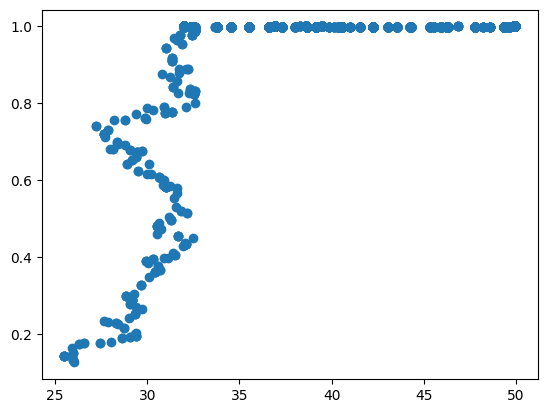

In [174]:
w0_inter = [20, 50]
w1_inter = [-1, 1]

w_inter = [w0_inter, w1_inter]

Chain = Monte_Carlo(X, y, w_inter, iter = 100000, sigma=.1)

plt.scatter(Chain[:,0], Chain[:,1])

#Chain

In [160]:
Chain[:,0]

array([24.98798266, 24.96077318, 24.96077318, ..., 24.1380018 ,
       24.1380018 , 24.1380018 ])

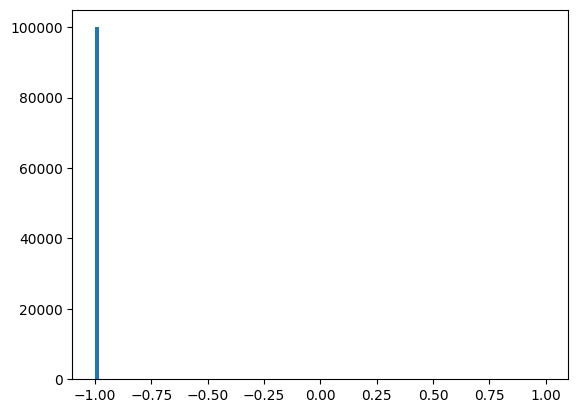

In [153]:
plt.hist(w1s, bins = 100, range=(-1,1));

In [122]:
lineal(X, [36.41, -0.0133])

array([11.1932, 11.14  , 11.0868, 11.0602, 11.0336, 10.9804, 10.874 ,
       10.8208, 10.7676, 10.7144, 10.6612, 10.5016, 10.4484, 10.3952,
       10.342 , 10.2888, 10.2356, 10.1824, 10.1292, 10.076 , 10.0228,
        9.9696,  9.9164,  9.8632,  9.81  ,  9.7568,  9.7036])